# Python Engineering Interview Question

This question demonstrates an illustrative example of the type of engineering question that could be encountered while supporting construction projects. The question is simplified and idealised, and there is not a "correct" implementation, instead we are interested in the approach and understanding of the task. Where important external resources or AI prompts are used, note them. The question can be completed with the packages provided in the `pixi.toml`, but if you feel confident you can justify using other packages you may do so.

In [1]:
%run __init__.py

In [2]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
import csv
from pathlib import Path

The array represents a simple 2D floor plan indicative of an architectural plan for an office building.  

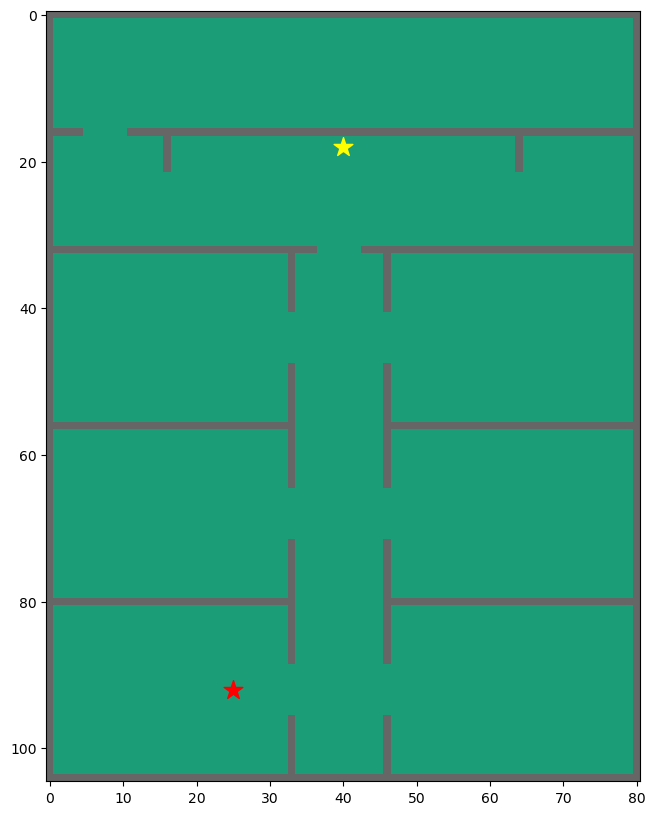

In [3]:

rows = list(csv.reader(Path("grid.tsv").open(encoding="utf-8"), delimiter="\t"))
grid = np.array([[int(x) for x in row] for row in rows])
start = (18, 40)
goal = (92, 25)

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(grid, cmap=plt.cm.Dark2)
ax.scatter(start[1], start[0], marker="*", color="yellow", s=200)
ax.scatter(goal[1], goal[0], marker="*", color="red", s=200)
plt.show()

1. Using a path finding algorithm find the shortest path from the start to the goal, avoiding the walls? 

- consider which algorithm to use, and why?
- allow orthogonal movement only (discussion point)
- apply a penalty for adding a bend in the path (discussion point)
- plot on the path on the grid
- consider how to deal with stud walls (they can be penetrated, but are ideally avoided...?)

Path cost: 93
Path length: 89.0


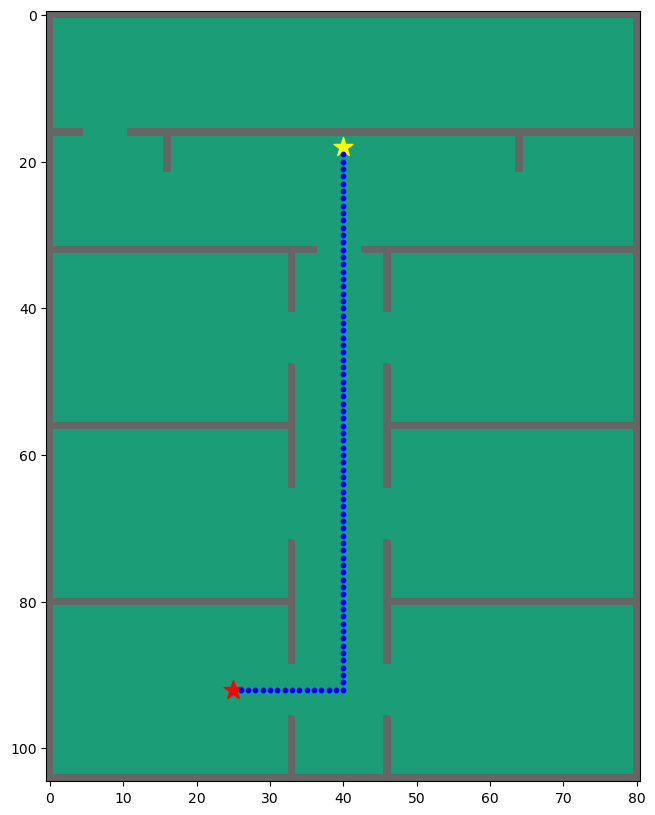

In [5]:
# %answer ./solutions/1.py

from Map import GridPoint, build_standard_grid_map_from_file, plot_path_on_grid_map
from PathFinder import AStarPathFinder
from Directions import create_orthogonal_movement

grid_map = build_standard_grid_map_from_file("grid.tsv")

movement = create_orthogonal_movement()

#Define start and end
start = GridPoint(40, 18)
goal = GridPoint(25, 92)

path_finder = AStarPathFinder(grid_map, start, goal, movement)
path = path_finder.find_path()
path_points = path.reconstruct_path()

if path_points:
    print(f"Path cost: {path.get_total_cost()}")
    print(f"Path length: {path.get_total_length()}")
    plot_path_on_grid_map(grid_map, start, goal, path_points)
else:
    print("No path found.")

del path_finder
del grid_map
del path

2. Find all the nodes in the path where the route changes direction? 
- plot these on the grid

In [ ]:
%answer ./solutions/2.py
%run ./solutions/2.py

3. Imagine that the path is the route of pipework. An engineer must calculate the length of pipework required, and the number of bends, and use this information to calculate the pressure drop down the length of the pipework.
- make a list of all the straight sections of pipework, and the bends from the start to the goal
- using the [fluids](https://fluids.readthedocs.io/tutorial.html#pressure-drop-through-piping) library, calculate the pressure drop along the length of the pipework

In [ ]:
%answer ./solutions/3.py
%run ./solutions/3.py